<h1> Pandas </h1>

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

<h2> Series </h2>


In [1]:
import pandas as pd

In [2]:
ser1 = pd.Series ([-2,3,4,3,-1])
print(type(ser1))
print(ser1)

<class 'pandas.core.series.Series'>
0   -2
1    3
2    4
3    3
4   -1
dtype: int64


<h3> Indeces to a Series </h3>

In [3]:
#passing a list to a Series
I = [x *2 for x      in range (0,5)]
ser2=pd.Series([-2,3,4,3,-1],index = I)
print(ser2)
#another index list
people=['albert','betty','charlotte','dana','elmer']
serP=pd.Series([-2,3,4,3,-1],people)
print(serP)


0   -2
2    3
4    4
6    3
8   -1
dtype: int64
albert      -2
betty        3
charlotte    4
dana         3
elmer       -1
dtype: int64


In [4]:

#Series from a  Dictionary
elem={'H':'Hydrogen', 'He':'Helium', 'Li':'Lithium', 'Be':'Beryllium','B':'Boron',
     'C':'Carbon','N':'Nitrogen'}
print("Elem Type: {}.".format(type(elem)))

serElem=pd.Series(elem)
print(serElem)
print("SerElem Type: {}.".format(type(serElem)))


Elem Type: <class 'dict'>.
H      Hydrogen
He       Helium
Li      Lithium
Be    Beryllium
B         Boron
C        Carbon
N      Nitrogen
dtype: object
SerElem Type: <class 'pandas.core.series.Series'>.


<p> <span style ="color:purple"> Convert the following dict in series "serElem2" and check </span>

In [5]:
elem2={'O':'Oxygen','F':'Flourine', 'Ne':'Neon', 'Na':'Sodium'}




In [6]:
#testElem2=pd.Series(elem2)

#assert(serElem2.equals(pd.Series(elem2))),"not equal"

In [7]:

serElem2= pd.Series(elem)
print(type(serElem2))

<class 'pandas.core.series.Series'>


<h3> Vector-like operations </h3>

In [8]:
ladies = [1,2,3]
serP[ladies]

betty        3
charlotte    4
dana         3
dtype: int64

<p> <span style ="color:purple"> Define a list 'males' and cast it on the series serP</span>

<h4> Using the apply(function) on Series </h4>

In [9]:
serP.apply(abs)

albert       2
betty        3
charlotte    4
dana         3
elmer        1
dtype: int64

In [10]:
serP.apply(lambda x: x**2)

albert        4
betty         9
charlotte    16
dana          9
elmer         1
dtype: int64

<p> <span style ="color:purple"> define serPdiv2 dividing by 2 serP values with .apply method</span>

In [11]:
serPdiv2= serP.apply(lambda x: x/2)
serPdiv2

albert      -1.0
betty        1.5
charlotte    2.0
dana         1.5
elmer       -0.5
dtype: float64

<h4> .value_counts: an immediate table</h4>

In [12]:


countries= pd.Series(['Italy', 'Italy', 'Germany'])
print(countries.value_counts(normalize=True))
print(countries.value_counts(normalize=True)*len(countries))
print()

Italy      0.666667
Germany    0.333333
dtype: float64
Italy      2.0
Germany    1.0
dtype: float64



<h2>Dataframe from other structures </h2>

In [13]:
import pandas as pd

<h3>from Series </h3>

In [14]:
ser1=pd.Series([str('Van Beethoven'), 'Germany',1770,1827],index=['name','nation','born', 'dec'])
ser2=pd.Series(['Francois Couperin', 'France',1685,1733],index=['name','nation','born', 'dec'])
ser3=pd.Series(['J.S Bach', 'Germany', 1685, 1750],index=['name','nation','born', 'dec'] )
ser4=pd.Series(['Joseph Haydn', 'Austria', 1732, 1809],index=['name','nation','born', 'dec'] )

In [15]:
serDF = pd.DataFrame([ser1,ser2,ser3,ser4])
serDF

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
1,Francois Couperin,France,1685,1733
2,J.S Bach,Germany,1685,1750
3,Joseph Haydn,Austria,1732,1809


In [16]:
serDF['name'].name =='name'

True

In [17]:
def df2Dic(df):
    '''converts dataframe in dictionary , assumes df is a pandas DataFrame'''
    dfDic={}
    for col in df.columns:
        dfDic[df[col].name]=df[col]
    return dfDic
D= df2Dic(serDF)

<h3> from Dictionary </h3>

In [18]:
#D={'name':['Van Beethoven','Francois Couperin'], 'nation':['Germany','France'], 'born':[1770,1685]}
D

{'name': 0        Van Beethoven
 1    Francois Couperin
 2             J.S Bach
 3         Joseph Haydn
 Name: name, dtype: object, 'nation': 0    Germany
 1     France
 2    Germany
 3    Austria
 Name: nation, dtype: object, 'born': 0    1770
 1    1685
 2    1685
 3    1732
 Name: born, dtype: int64, 'dec': 0    1827
 1    1733
 2    1750
 3    1809
 Name: dec, dtype: int64}

In [19]:
dicDF= pd.DataFrame(D)
dicDF

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
1,Francois Couperin,France,1685,1733
2,J.S Bach,Germany,1685,1750
3,Joseph Haydn,Austria,1732,1809


In [20]:
#show columns
serDF.columns

Index(['name', 'nation', 'born', 'dec'], dtype='object')

<p> each <b> column </b> is a <b> named Series </b>

In [21]:
type(serDF['name'])

pandas.core.series.Series

In [22]:
print(serDF.index)
print(serDF['name'].index)

RangeIndex(start=0, stop=4, step=1)
RangeIndex(start=0, stop=4, step=1)


<h3> Slice and accessing </h3>

In [23]:
serDF[1:3]

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
2,J.S Bach,Germany,1685,1750


In [24]:
#access by index
serDF.iloc[1:3]

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
2,J.S Bach,Germany,1685,1750


In [25]:
#subsets with loc
serDF.loc[[0,3]]

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
3,Joseph Haydn,Austria,1732,1809


In [26]:
#filtering Rbase-like
serDF[serDF['nation']=='Germany']

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
2,J.S Bach,Germany,1685,1750


In [27]:
#filtering multiple conditions

In [28]:
serDF[ (serDF.born > 1600) & ( serDF.born < 1700 )] #      or
serDF[ (serDF['born'] > 1600) & ( serDF['born'] < 1700 )]

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
2,J.S Bach,Germany,1685,1750


<p> <span style ="color:purple"> select Austrian and French in df 'AF' </span>

In [29]:
AF= serDF[ (serDF.nation=='France') | (serDF.nation=='Austria')]
AF

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
3,Joseph Haydn,Austria,1732,1809


<h4> Lookup one value , other column that the one queried  with .loc{DF{col] </h4>

In [30]:
countryCouperin=serDF[serDF['name']=='Francois Couperin'].iloc[0]['nation']
countryCouperin

'France'

<p> <span style ="color:purple"> get HaydnBorn with the same method </span>

In [31]:
HaydnBorn = serDF[serDF['name']=='Joseph Haydn'].iloc[0]['born']
HaydnBorn

1732

string functions 
https://pandas.pydata.org/pandas-docs/stable/text.html

In [32]:
#!= negative operator
serDF[ serDF.born != 1685]

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
3,Joseph Haydn,Austria,1732,1809


<h3>Dropping columns </h3>

In [33]:
noNation = serDF.drop('nation',1)
noNation.head(2)

,name,born,dec
0,Van Beethoven,1770,1827
1,Francois Couperin,1685,1733


<h3>Group by </h3>

In [34]:
cols=['code',   'name', 'category' , 'price' , 'quantity']
p1=pd.Series(['001', 'pear', 'fruit', 1.5, 200], cols)
p2=pd.Series(['002', 'apple', 'fruit', 1.2, 300], cols)
p3=pd.Series(['003', 'orange', 'fruit', 1, 250], cols)
p4=pd.Series(['004', 'potato', 'veg', 0.7, 550], cols)
p5=pd.Series(['005', 'cucumber', 'veg', 0.8, 800], cols)
p6=pd.Series(['006', 'eggplant', 'veg', 1.3, 120], cols)
p7=pd.Series(['007', 'chickpeas', 'legumes', 2.3, 120], cols)
p8=pd.Series(['008', 'red lentils', 'legumes', 2.1, 750], cols)
# DataFrame from a [list] of series as erlier
shop = pd.DataFrame([p1,p2,p3,p4,p5,p6,p7,p8])
#shop

In [35]:
shopCat=shop[['name','category']].groupby('category').count()
shopCat
shopCatQ=shop[['category','quantity']].groupby('category').aggregate(['sum'])
shopCatQ                                                                      


,quantity
,sum
category,
fruit,750
legumes,870
veg,1470


optional for a plot.bar()

In [36]:
#%matplotlib inline
#shopCatQ.plot.bar()

<p> <span style ="color:purple">group by and get the mean price per category in a shopMean df</span>

In [37]:
shopMean = shop[['category', 'price']].groupby('category').aggregate(['mean'])

In [38]:
shopMean

,price
,mean
category,
fruit,1.233333
legumes,2.200000
veg,0.933333


<h3>Aggregate, filter, transform, apply</h3>

In [39]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

In [40]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [41]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

<p> <span style ="color:purple">group by key and aggregate the sum and count </span>

In [42]:
df.groupby('key').aggregate(['count', 'sum'])

data1     data2    
    count sum count sum
key                    
A       2   3     2   8
B       2   5     2   7
C       2   7     2  12

In [43]:
#transformation
#df.groupby('key').transform(lambda x: x - x.mean())

In [44]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
display('df', "df.groupby('key').apply(norm_by_data2)")
#df.groupby('key').apply(norm_by_data2)

'df'

"df.groupby('key').apply(norm_by_data2)"

In [45]:
def price_stock(row):
    return row['price']*row['quantity'    ]
shop['stock']= shop.apply(price_stock, axis=1)
shop

,code,name,category,price,quantity,stock
0,001,pear,fruit,1.5,200,300.0
1,002,apple,fruit,1.2,300,360.0
2,003,orange,fruit,1.0,250,250.0
3,004,potato,veg,0.7,550,385.0
4,005,cucumber,veg,0.8,800,640.0
5,006,eggplant,veg,1.3,120,156.0
6,007,chickpeas,legumes,2.3,120,276.0
7,008,red lentils,legumes,2.1,750,1575.0


<h3> Working with multiple DataFrames </h3>

In [46]:
from io import StringIO

#import hashlib

In [47]:
with StringIO("""composer, work, year
Van Beethoven,Opus 61 Violin Concerto in D major ,1806
Van Beethoven, Opus 50 Romance for Violin and Orchestra No. 2 in F major, 1798
J.S Bach, Partita No. 6 in E minor BWV 830, 1731""") as fp:
    works = pd.read_csv(fp)
works
#works['composer'] =works['composer'].astype(str)
#serDF['name'] =serDF['name'].astype(str)


,composer,work,year
0,Van Beethoven,Opus 61 Violin Concerto in D major,1806
1,Van Beethoven,Opus 50 Romance for Violin and Orchestra No. ...,1798
2,J.S Bach,Partita No. 6 in E minor BWV 830,1731


<h4> merge join </h4>

In [48]:
A.columns

NameError: name 'A' is not defined

In [ ]:
#inner Join"
A=serDF.copy()
B=works.copy()
print("\n inner join")

innerDF=serDF.merge(works,left_on='name', right_on='composer')
innerDF

In [ ]:
print("\n left join")
L=A.merge(B,left_on='name', right_on='composer', how="left")
L

<h4> pd.concat </h4>

In [ ]:
cols =['name','nation','born', 'dec']

In [ ]:
df2= pd.DataFrame([pd.Series   (['W. A. Mozart','Austria',1756,1791],index=cols)])
df2

In [ ]:
dfTotal=pd.concat([A,df2])
dfTotal


https://pandas.pydata.org/pandas-docs/stable/merging.html

<h3>Selections, Data manipulations, Quering rows and columns </h3>

<p> <span style ="color:purple">load  the USDA.csv database as df</span>

In [ ]:
df = pd.read_csv("USDA.csv")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 16 columns):
ID              7058 non-null int64
Description     7058 non-null object
Calories        7057 non-null float64
Protein         7057 non-null float64
TotalFat        7057 non-null float64
Carbohydrate    7057 non-null float64
Sodium          6974 non-null float64
SaturatedFat    6757 non-null float64
Cholesterol     6770 non-null float64
Sugar           5148 non-null float64
Calcium         6922 non-null float64
Iron            6935 non-null float64
Potassium       6649 non-null float64
VitaminC        6726 non-null float64
VitaminE        4338 non-null float64
VitaminD        4224 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 882.3+ KB


In [53]:
sodium=(df['Sodium'])

which is the name(Description) of the maximum Sodium?

In [54]:
df.loc[df['Sodium']== max(df['Sodium']), 'Description'].iloc[0]

'SALT,TABLE'

`df.loc[df['selectedField'] == max[df'selectedField']), 'targetField'].iloc[0]`

<p> <span style ="color:purple">get the Description and ID of the max Cholesterol food</span>


In [81]:
df.loc[ df['Cholesterol']==max(df['Cholesterol']),['ID','Description']].iloc[0]

ID                                                   13320
Description    BEEF,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,SIMMRD
Name: 3533, dtype: object

<p> <span style ="color:purple">get the Description of the max Potassium food</span>

In [72]:
df.loc[ df['Potassium']==max(df['Potassium'] ) ,'Description' ].iloc[0]

'LEAVENING AGENTS,CRM OF TARTAR'

<p> <span style ="color:purple">get get all the descriptions  containing "BEANS" in the string</span>

`df.loc[df['selectedField'].str.contains('selectedStr'), 'targetField']`

In [83]:
df.loc[df['Description'].str.contains('BEANS'), 'Description']

2607               BEANS,KIDNEY,MATURE SEEDS,SPROUTED,RAW
2608    BEANS,KIDNEY,MATURE SEEDS,SPROUTED,CKD,BLD,DRN...
2611        BEANS,LIMA,IMMAT SEEDS,CND,REG PK,SOL&LIQUIDS
2619                 BEANS,NAVY,MATURE SEEDS,SPROUTED,RAW
2620    BEANS,NAVY,MATURE SEEDS,SPROUTED,CKD,BLD,DRND,...
2621                   BEANS,PINTO,IMMAT SEEDS,FRZ,UNPREP
2622     BEANS,PINTO,IMMAT SEEDS,FRZ,CKD,BLD,DRND,WO/SALT
2623                      BEANS,SHELLIE,CND,SOL & LIQUIDS
2624                                 BEANS,SNAP,GREEN,RAW
2625                  BEANS,SNAP,GRN,CKD,BLD,DRND,WO/SALT
2626            BEANS,SNAP,GRN VAR,CND,REG PK,SOL&LIQUIDS
2627                   BEANS,SNAP,GRN,CND,REG PK,DRND SOL
2628       BEANS,SNAP,CND,ALL STYLES,SEASONED,SOL&LIQUIDS
2629                 BEANS,SNAP,GRN,FRZ,ALL STYLES,UNPREP
2630              BEANS,SNAP,GRN,FRZ,CKD,BLD,DRND WO/SALT
2631             BEANS,SNAP,GRN,FRZ,ALL STYLES,MICROWAVED
2632                            BEANS,SNAP,GRN,MICROWAVED
2639          

<p> <span style ="color:purple">get get the mean and std of foods  containing "BEANS" in the string</span>

111.2926901078502

In [100]:
meanB= df.loc[df['Description'].str.contains('BEANS'), 'Calories'].mean()
stdB= df.loc[df['Description'].str.contains('BEANS'), 'Calories'].std()
print("mean: {:.1F}, stdev: {:.1F}".format(meanB,stdB))

mean: 138.7, stdev: 111.3


<p> <span style ="color:purple">get the calories in beanCals and draw histogram</span>

In [106]:
import matplotlib.pyplot as plt



In [104]:
beanCals=df.loc[ df['Description'].str.contains("BEANS") , 'Calories'  ]

(array([23., 11.,  9., 11., 24., 30.,  4.,  2.,  0.,  1.,  1.,  0.,  0.,
         5., 13.,  1.,  0.,  0.,  1.,  3.]),
 array([ 12.  ,  34.95,  57.9 ,  80.85, 103.8 , 126.75, 149.7 , 172.65,
        195.6 , 218.55, 241.5 , 264.45, 287.4 , 310.35, 333.3 , 356.25,
        379.2 , 402.15, 425.1 , 448.05, 471.  ]),
 <a list of 20 Patch objects>)

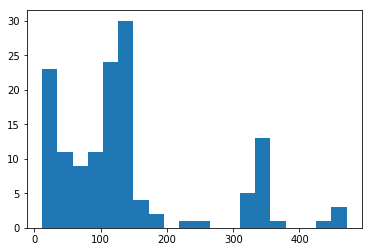

In [109]:
plt.hist(beanCals, bins=20)

<p> <span style ="color:purple">subset  hiSodium as df which Sodium > 10000</span>

In [116]:
hiSodium = df.loc[df['Sodium']>10000]
#hiSodium.describe()

<h4> nlargest() </h4>

 `nlargest( k , 'selField' )`

In [120]:
df.nlargest(3,'Cholesterol')

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
3533,13320,"BEEF,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,SIMMRD",151.0,11.67,10.53,1.48,108.0,2.394,3100.0,0.0,9.0,2.30,244.0,10.5,1.67,0.0
4933,17189,"VEAL,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,BRSD",136.0,11.48,9.63,0.00,156.0,2.180,3100.0,NaN,16.0,1.67,214.0,13.0,NaN,NaN
3531,13318,"BEEF,VAR MEATS&BY-PRODUCTS,BRAIN,RAW",143.0,10.86,10.30,1.05,126.0,2.300,3010.0,0.0,43.0,2.55,274.0,10.7,0.99,NaN


<p> <span style ="color:purple">subset  threeProt as the Descriptions of the 3 richest proteins foods > 10000</span>

`nlargest( k , 'selField' )['targetField']`


In [124]:
threeProt=df.nlargest(3,'Protein')['Description']